In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Oct 12 21:14:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# PKM

In [ ]:
import pandas as pd
train = pd.read_csv("/content/gdrive/MyDrive/dataset/dataset_semilu/training2_3.csv")
test = pd.read_csv("/content/gdrive/MyDrive/dataset/dataset_semilu/testing2.csv")
train['TOKEN_STR'].head()
test['TOKEN_STR'].head()

0    cocok kasi prabowo sempat akhir gagal saran ho...
1    lembaga mk noda rakyat negara pemilu tutup khi...
2    setuju nyata rocky gerung anies akhir jadi dea...
3    jadi peringkat berapa anies mesti makin tenang...
4    presiden selametin muka bonus nurunin pamor pr...
Name: TOKEN_STR, dtype: object

acak data

In [ ]:
train = train.sample(frac=1)
test = test.sample(frac=1)
train

,SENTIMENT,TOKEN_STR
193,NEGATIVE,anies jadi gub jawa tengah kasus ini jadi gore...
1732,POSITIVE,anies mungkin lanjut begini bangunx pakai huta...
347,NEGATIVE,mana bukti omong ganjar
596,POSITIVE,anies menang telak harus dukung adem kalem san...
1895,NEGATIVE,lama ada maka jadi presiden makin jauh
...,...,...
1522,POSITIVE,saya tinggal jawa tengah laku model mau coba j...
270,NEGATIVE,pokoke jangan ganjar menang mau jadi badut
1289,POSITIVE,peran sebagai menteri tahan prabowo membuktika...
1676,POSITIVE,karya anak bangsa fenomenal salah satu asal an...


<Axes: xlabel='SENTIMENT', ylabel='Count'>

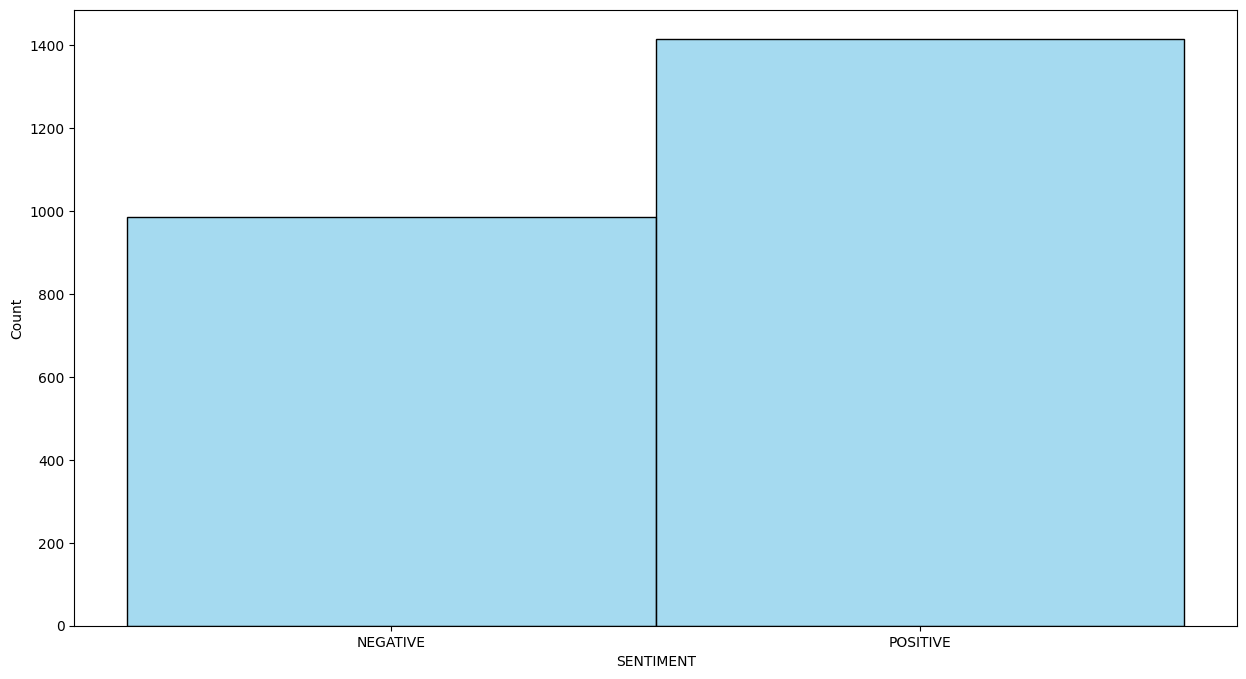

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,1, figsize = (15, 8))

sns.histplot(data = train, x = 'SENTIMENT', color='skyblue')

In [ ]:
train.SENTIMENT.value_counts()

POSITIVE    1428
NEGATIVE     572
Name: SENTIMENT, dtype: int64

TF-IDF

In [ ]:
x_train = train['TOKEN_STR']
x_test = test['TOKEN_STR']
y_train = train['SENTIMENT']
y_test = test['SENTIMENT']
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400,)
(600,)
(2400,)
(600,)


Hyperparameter Tunning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

param_grid = {
    'vect__max_features': [1000, 2500, 5000],  # Jumlah fitur maksimum
    'vect__max_df': [0.25, 0.5, 0.75, 1.0],          # Nilai max_df
    'vect__min_df': [1, 2, 3, 4, 5],                 # Nilai min_df
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Parameter terbaik:", grid_search.best_params_)
print("Hasil terbaik:", grid_search.best_score_)

Parameter terbaik: {'vect__max_df': 0.25, 'vect__max_features': 1000, 'vect__min_df': 3}
Hasil terbaik: 0.6616666666666666


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.25, min_df=3, max_features=1000)
x_tfidf_train = tfidf.fit_transform(x_train)
x_tfidf_test = tfidf.transform(x_test)

print(x_tfidf_train.shape)
print(x_tfidf_train[:1])
print(x_tfidf_test.shape)
print(x_tfidf_test[:1])

(2400, 1000)
  (0, 148)	0.4039940090387276
  (0, 192)	0.378527088894799
  (0, 363)	0.2573996820731859
  (0, 618)	0.36741889281831797
  (0, 863)	0.4039940090387276
  (0, 535)	0.24495112374257927
  (0, 269)	0.4309552529503538
  (0, 194)	0.28865238972679597
(600, 1000)
  (0, 820)	0.31103145897583123
  (0, 787)	0.35793969745909165
  (0, 655)	0.28094053248777884
  (0, 594)	0.2210403507523779
  (0, 491)	0.1996980482530095
  (0, 412)	0.32690941215983566
  (0, 321)	0.2989298619712176
  (0, 266)	0.26481039347926877
  (0, 190)	0.3046239047413884
  (0, 74)	0.2081093160366905
  (0, 19)	0.26481039347926877
  (0, 5)	0.36727339774572154


SMOTE

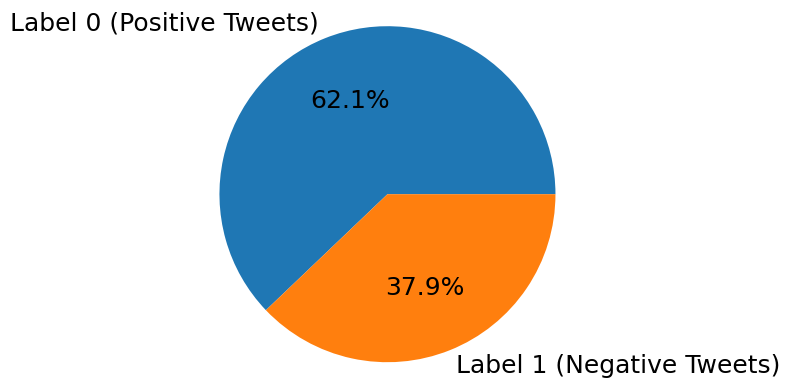

In [ ]:
import matplotlib.pyplot as plt

# Class Imbalance Check
plt.pie(y_train.value_counts(),
        labels=['Label 0 (Positive Tweets)', 'Label 1 (Negative Tweets)'],
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

(2830, 1000) (2830,)


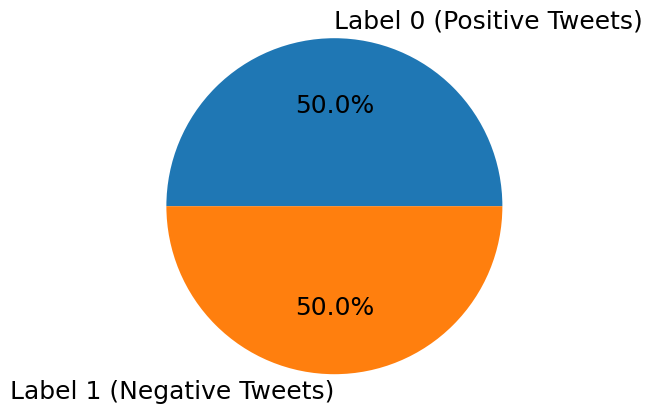

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE to deal with the class imbalance
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(x_tfidf_train, y_train.values)
print(X_train_smote.shape, y_train_smote.shape)

# Class Imbalance Check
plt.pie(pd.value_counts(y_train_smote),
        labels=['Label 0 (Positive Tweets)', 'Label 1 (Negative Tweets)'],
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Distribusi Sentimen Sebelum SMOTE')

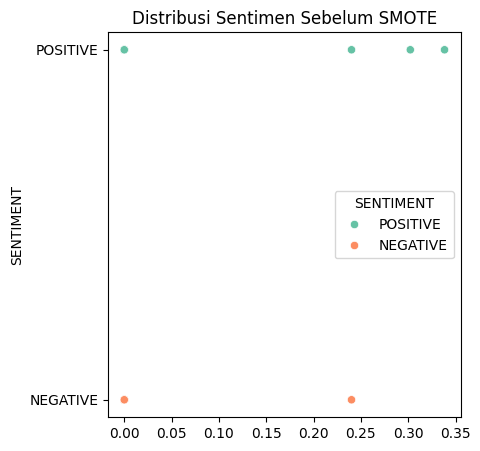

In [ ]:
# Tampilkan distribusi sebelum SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=x_tfidf_train[:, 0].toarray().flatten(), y=y_train, hue=y_train, palette='Set2')
plt.title('Distribusi Sentimen Sebelum SMOTE')

Text(0.5, 1.0, 'Distribusi Sentimen Setelah SMOTE')

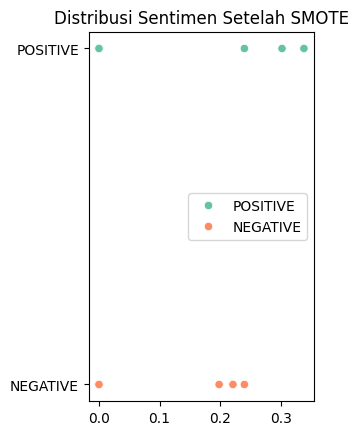

In [ ]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_smote[:, 0].toarray().flatten(), y=y_train_smote, hue=y_train_smote, palette='Set2')
plt.title('Distribusi Sentimen Setelah SMOTE')

In [ ]:
print(X_train_smote[:1])

  (0, 708)	0.18840866970070533
  (0, 916)	0.17653178925609528
  (0, 5507)	0.21682354078717406
  (0, 611)	0.25089234173713504
  (0, 1637)	0.25089234173713504
  (0, 2667)	0.5017846834742701
  (0, 1939)	0.12004220507177
  (0, 3495)	0.17135131529182973
  (0, 4803)	0.18840866970070533
  (0, 2897)	0.11423663305266517
  (0, 2403)	0.25089234173713504
  (0, 3211)	0.47663712195001595
  (0, 1418)	0.2009824504628324
  (0, 3974)	0.06879351197900557
  (0, 3362)	0.25089234173713504
  (0, 922)	0.1346173743609692


WordCloud Non Smote

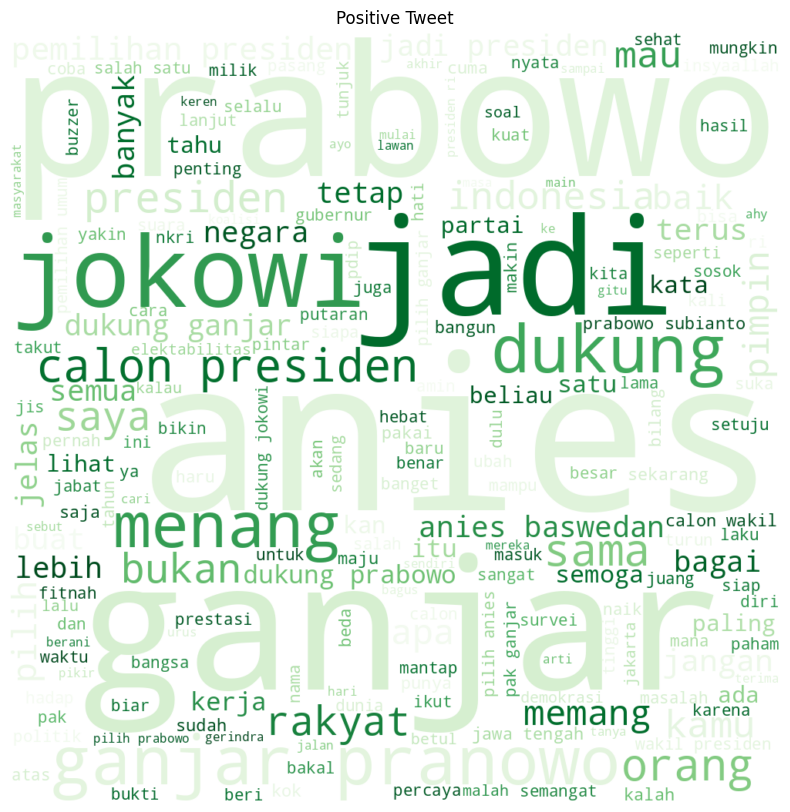

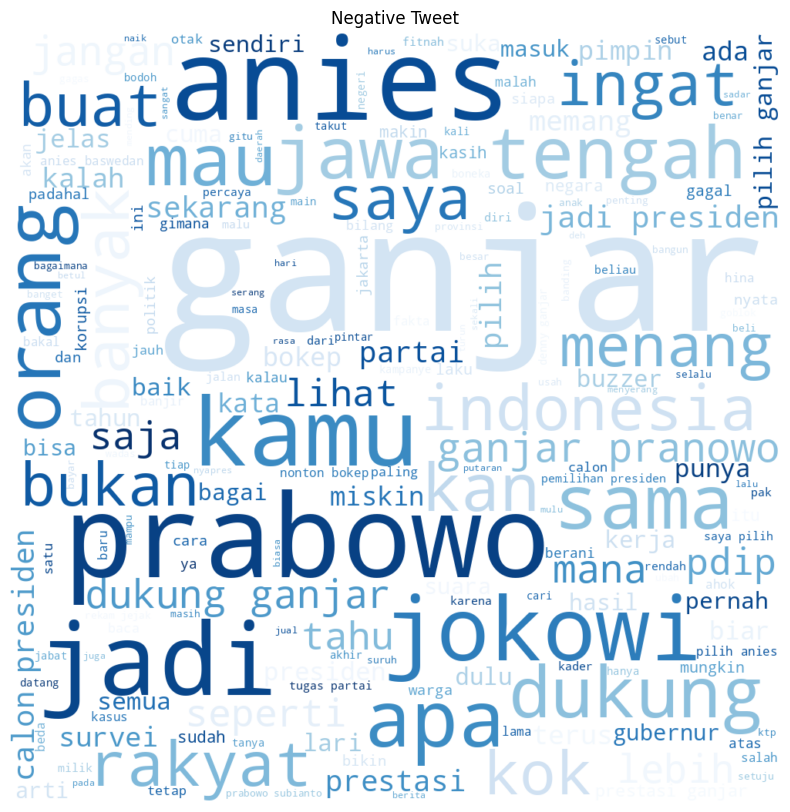

In [ ]:
from wordcloud import WordCloud

# Positif
data_positif = train[train['SENTIMENT'] == 'POSITIVE']
all_text_positif = ' '.join(map(str, data_positif['TOKEN_STR']))
wordcloud = WordCloud(colormap='Greens_r', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_positif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Positive Tweet')
plt.show()

# Negatif
data_positif = train[train['SENTIMENT'] == 'NEGATIVE']
all_text_positif = ' '.join(map(str, data_positif['TOKEN_STR']))
wordcloud = WordCloud(colormap='Blues_r', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_positif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Negative Tweet')
plt.show()

WordCloud Smote

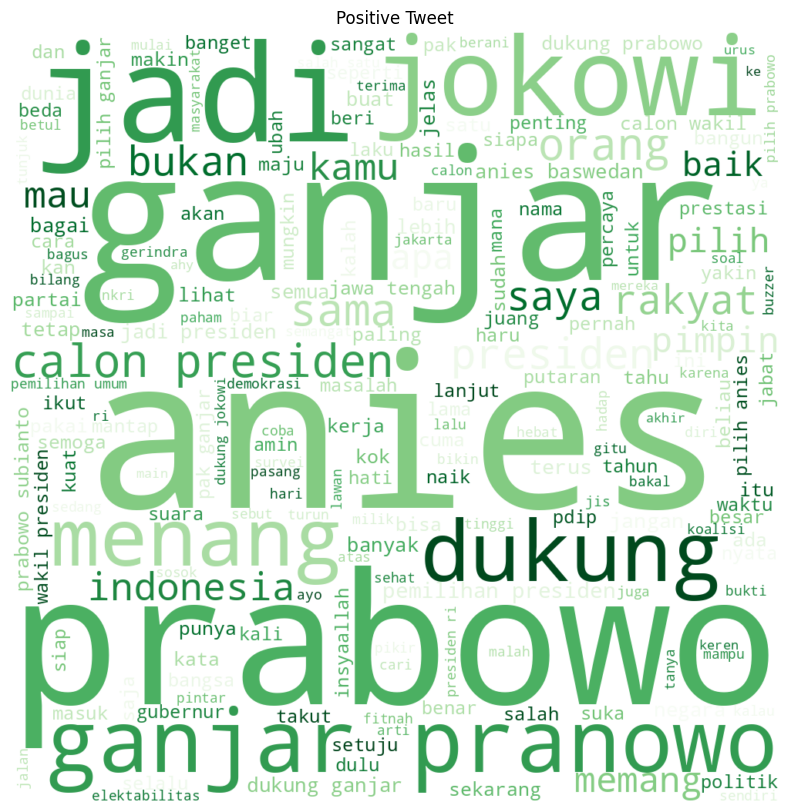

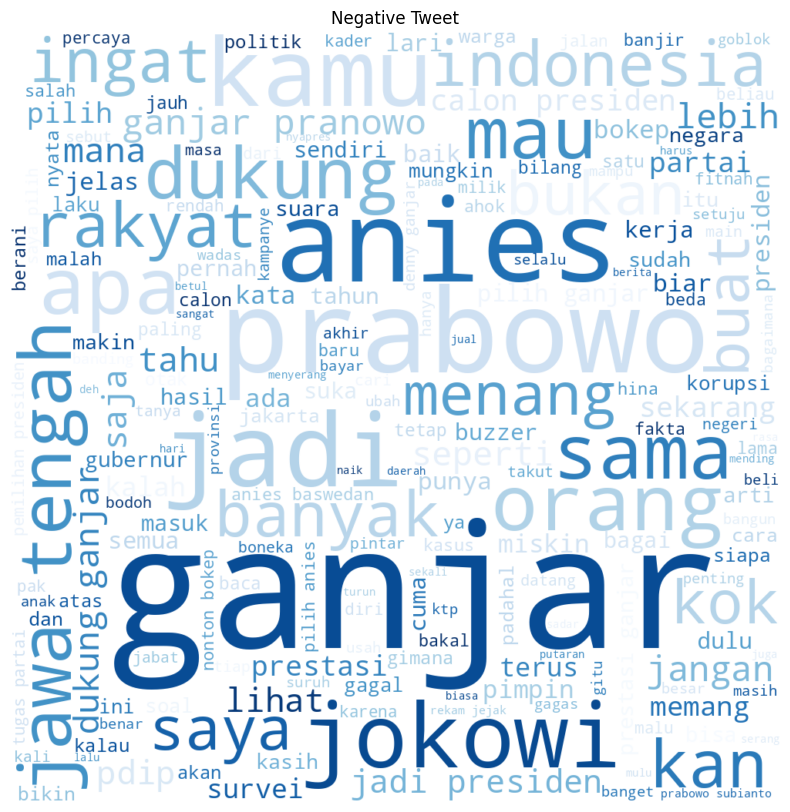

In [ ]:
from wordcloud import WordCloud

# Positif
data_positif = train[train['SENTIMENT'] == 'POSITIVE']
all_text_positif = ' '.join(map(str, data_positif['TOKEN_STR']))
wordcloud = WordCloud(colormap='Greens_r', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_positif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Positive Tweet')
plt.show()

# Negatif
data_positif = train[train['SENTIMENT'] == 'NEGATIVE']
all_text_positif = ' '.join(map(str, data_positif['TOKEN_STR']))
wordcloud = WordCloud(colormap='Blues_r', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_positif)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.title('Negative Tweet')
plt.show()

Non SMOTE

In [ ]:
# Non SMOTE
x_train = x_tfidf_train
x_test = x_tfidf_test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score, confusion_matrix
from pandas import DataFrame
import seaborn as sn

def printResults(y_true, y_predicted):
  print("Accuracy = ", accuracy_score(y_true, y_predicted))

  columns=['false', 'true']
  # ConfusionMatrixDisplay(y_true, y_predicted, columns)
  precision, recall, fscore, support = score(y_true, y_predicted)

  print('#################################')
  print('precision: {}'.format(precision))
  print('recall: {}'.format(recall))
  print('fscore: {}'.format(fscore))
  print('support: {}'.format(support))
  print('#################################')

  print('Macro F1 ',f1_score(y_true, y_predicted, average='macro'))

  print('Micro F1 ', f1_score(y_true, y_predicted, average='micro'))

  print("#############################")

  kolom = ['negatif','positif']
  confm = confusion_matrix(y_true, y_predicted)
  df_cm = DataFrame(confm, index=kolom, columns=kolom)
  # Mengatur ukuran font untuk plot
  plt.rcParams['font.size'] = 18  # Sesuaikan ukuran font sesuai kebutuhan

  ax = sn.heatmap(df_cm, cmap='Blues', annot=True, fmt='g')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Label prediksi')
  ax.set_ylabel('Label sebenarnya')


HASIL NAIVE BAYES CLASSIFIER TRAINING
Accuracy =  0.47
#################################
precision: [0.87671233 0.33920705]
recall: [0.29906542 0.89534884]
fscore: [0.44599303 0.49201278]
support: [428 172]
#################################
Macro F1  0.4690029054558003
Micro F1  0.47
#############################


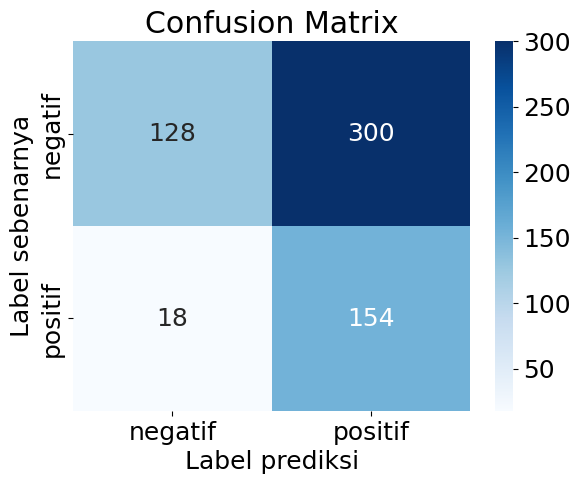

In [ ]:
#naive bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt

clfNB = MultinomialNB()
clfNB.fit(x_train, y_train)

#test naive bayes accuracy
testLabelsPredicted=list(clfNB.predict(x_test))

#print results
print("HASIL NAIVE BAYES CLASSIFIER TRAINING")
printResults(y_test, testLabelsPredicted)

SMOTE

In [ ]:
# SMOTE
x_train = X_train_smote
y_train = y_train_smote
x_test = x_tfidf_test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score, confusion_matrix
from pandas import DataFrame
import seaborn as sn

def printResults(y_true, y_predicted):
  print("Accuracy = ", accuracy_score(y_true, y_predicted))

  columns=['false', 'true']
  # ConfusionMatrixDisplay(y_true, y_predicted, columns)
  precision, recall, fscore, support = score(y_true, y_predicted)

  print('#################################')
  print('precision: {}'.format(precision))
  print('recall: {}'.format(recall))
  print('fscore: {}'.format(fscore))
  print('support: {}'.format(support))
  print('#################################')

  print('Macro F1 ',f1_score(y_true, y_predicted, average='macro'))

  print('Micro F1 ', f1_score(y_true, y_predicted, average='micro'))

  print("#############################")

  kolom = ['negatif','positif']
  confm = confusion_matrix(y_true, y_predicted)
  df_cm = DataFrame(confm, index=kolom, columns=kolom)

  # Mengatur ukuran font untuk plot
  plt.rcParams['font.size'] = 18  # Sesuaikan ukuran font sesuai kebutuhan

  ax = sn.heatmap(df_cm, cmap='Blues', annot=True, fmt='g')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Label prediksi')
  ax.set_ylabel('Label sebenarnya')


HASIL NAIVE BAYES CLASSIFIER TRAINING
Accuracy =  0.7366666666666667
#################################
precision: [0.87292818 0.52941176]
recall: [0.73831776 0.73255814]
fscore: [0.8        0.61463415]
support: [428 172]
#################################
Macro F1  0.7073170731707317
Micro F1  0.7366666666666667
#############################


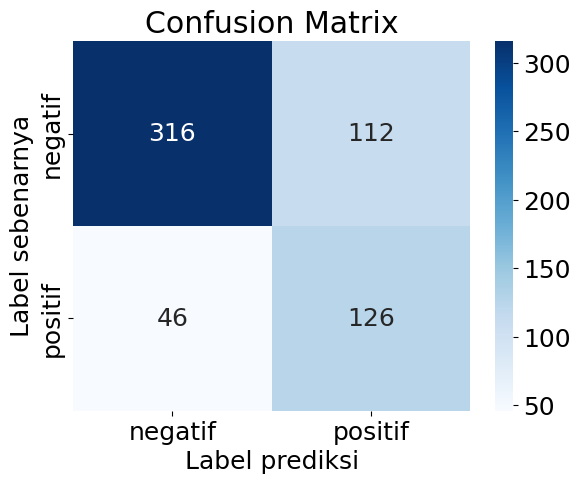

In [ ]:
#naive bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

clfNB = MultinomialNB()
clfNB.fit(x_train, y_train)

#test naive bayes accuracy
testLabelsPredicted=list(clfNB.predict(x_test))

#print results
print("HASIL NAIVE BAYES CLASSIFIER TRAINING")
printResults(y_test, testLabelsPredicted)

# TUGAS AKHIR

In [3]:
import pandas as pd
train1 = pd.read_csv("/content/gdrive/MyDrive/dataset/dataset_semilu/training2_1.csv")
train2 = pd.read_csv("/content/gdrive/MyDrive/dataset/dataset_semilu/training2_2.csv")
train3 = pd.read_csv("/content/gdrive/MyDrive/dataset/dataset_semilu/training2_3.csv")
test = pd.read_csv("/content/gdrive/MyDrive/dataset/dataset_semilu/testing2.csv")

In [4]:
x_train1 = train1['TOKEN_STR']
y_train1 = train1['SENTIMENT']
x_train2 = train2['TOKEN_STR']
y_train2 = train2['SENTIMENT']
x_train3 = train3['TOKEN_STR']
y_train3 = train3['SENTIMENT']
x_test = test['TOKEN_STR']
y_test = test['SENTIMENT']
print("Uji 1 x train", x_train1.shape)
print("Uji 1 y train", y_train1.shape)
print("Uji 2 x train", x_train2.shape)
print("Uji 2 y train", y_train2.shape)
print("Uji 3 x train", x_train3.shape)
print("Uji 3 y train", y_train3.shape)
print("x test", x_test.shape)
print("y test", y_test.shape)

Uji 1 x train (1600,)
Uji 1 y train (1600,)
Uji 2 x train (2000,)
Uji 2 y train (2000,)
Uji 3 x train (2400,)
Uji 3 y train (2400,)
x test (600,)
y test (600,)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.25, min_df=3, max_features=1000)
x_tfidf_train1 = tfidf.fit_transform(x_train1)
x_tfidf_train2 = tfidf.fit_transform(x_train2)
x_tfidf_train3 = tfidf.fit_transform(x_train3)
x_tfidf_test = tfidf.transform(x_test)

In [11]:
from imblearn.over_sampling import SMOTE

# SMOTE to deal with the class imbalance
smote = SMOTE()
X_train_smote1, y_train_smote1 = smote.fit_resample(x_tfidf_train1, y_train1.values)
X_train_smote2, y_train_smote2 = smote.fit_resample(x_tfidf_train2, y_train2.values)
X_train_smote3, y_train_smote3 = smote.fit_resample(x_tfidf_train3, y_train3.values)
print(X_train_smote1.shape, y_train_smote1.shape)
print(X_train_smote2.shape, y_train_smote2.shape)
print(X_train_smote3.shape, y_train_smote3.shape)

(1988, 1000) (1988,)
(2404, 1000) (2404,)
(2830, 1000) (2830,)


In [6]:
# Non SMOTE
x_train1 = x_tfidf_train1
x_train2 = x_tfidf_train2
x_train3 = x_tfidf_train3
x_test = x_tfidf_test

In [12]:
# SMOTE
x_train_smote1 = X_train_smote1
y_train_smote1 = y_train_smote1
x_train_smote2 = X_train_smote2
y_train_smote2 = y_train_smote2
x_train_smote3 = X_train_smote3
y_train_smote3 = y_train_smote3
x_test = x_tfidf_test

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score, confusion_matrix
from pandas import DataFrame
import seaborn as sn
import matplotlib.pyplot as plt

def printResults(y_true, y_predicted):
  print("Accuracy = ", accuracy_score(y_true, y_predicted))

  columns=['false', 'true']
  # ConfusionMatrixDisplay(y_true, y_predicted, columns)
  precision, recall, fscore, support = score(y_true, y_predicted)

  print('#################################')
  print('precision: {}'.format(precision))
  print('recall: {}'.format(recall))
  print('fscore: {}'.format(fscore))
  print('support: {}'.format(support))
  print('#################################')

  print('Macro F1 ',f1_score(y_true, y_predicted, average='macro'))

  print('Micro F1 ', f1_score(y_true, y_predicted, average='micro'))

  print("#############################")

  kolom = ['negatif','positif']
  confm = confusion_matrix(y_true, y_predicted)
  df_cm = DataFrame(confm, index=kolom, columns=kolom)

  # Mengatur ukuran font untuk plot
  plt.rcParams['font.size'] = 18  # Sesuaikan ukuran font sesuai kebutuhan

  ax = sn.heatmap(df_cm, cmap='Blues', annot=True, fmt='g')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Label prediksi')
  ax.set_ylabel('Label sebenarnya')

Non SMOTE

## Train 1

HASIL NAIVE BAYES CLASSIFIER TRAINING
Accuracy =  0.44333333333333336
#################################
precision: [0.76704545 0.30896226]
recall: [0.31542056 0.76162791]
fscore: [0.44701987 0.43959732]
support: [428 172]
#################################
Macro F1  0.44330859149295526
Micro F1  0.44333333333333336
#############################


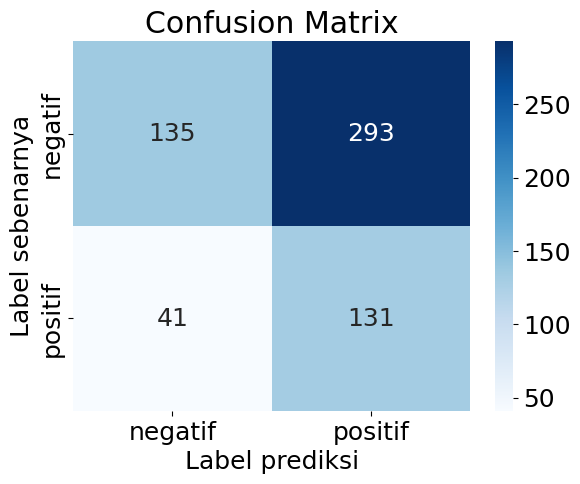

In [8]:
#naive bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

NB1 = MultinomialNB()
NB1.fit(x_train1, y_train1)

#test naive bayes accuracy
testLabelsPredicted=list(NB1.predict(x_test))

#print results
print("HASIL NAIVE BAYES CLASSIFIER TRAINING")
printResults(y_test, testLabelsPredicted)

## Train 2

HASIL NAIVE BAYES CLASSIFIER TRAINING
Accuracy =  0.43333333333333335
#################################
precision: [0.74444444 0.3       ]
recall: [0.31308411 0.73255814]
fscore: [0.44078947 0.42567568]
support: [428 172]
#################################
Macro F1  0.4332325746799431
Micro F1  0.43333333333333335
#############################


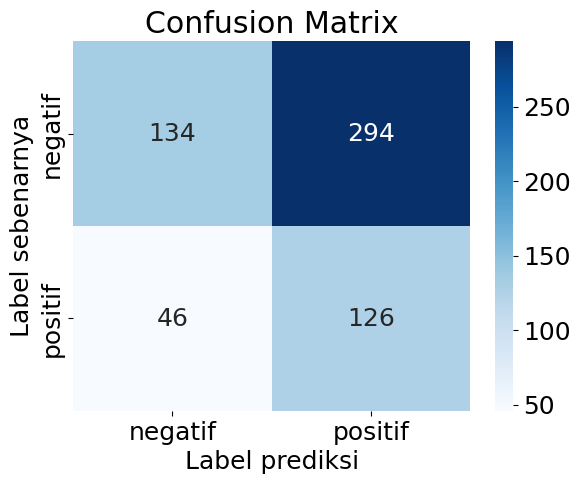

In [9]:
#naive bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

NB2 = MultinomialNB()
NB2.fit(x_train2, y_train2)

#test naive bayes accuracy
testLabelsPredicted=list(NB2.predict(x_test))

#print results
print("HASIL NAIVE BAYES CLASSIFIER TRAINING")
printResults(y_test, testLabelsPredicted)

## Train 3

HASIL NAIVE BAYES CLASSIFIER TRAINING
Accuracy =  0.5783333333333334
#################################
precision: [0.89237668 0.39257294]
recall: [0.46495327 0.86046512]
fscore: [0.61136713 0.53916211]
support: [428 172]
#################################
Macro F1  0.5752646202143823
Micro F1  0.5783333333333334
#############################


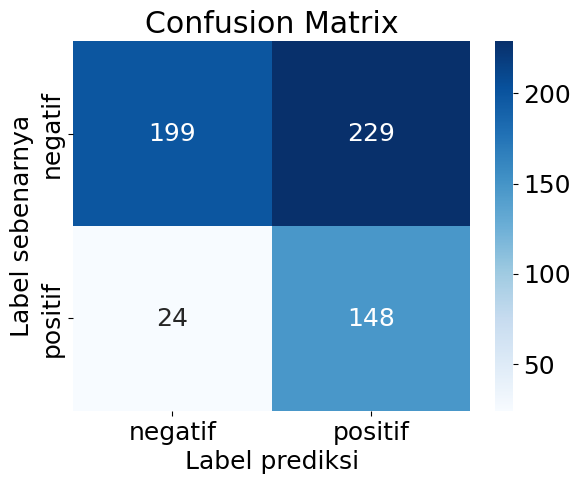

In [10]:
#naive bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

NB3 = MultinomialNB()
NB3.fit(x_train3, y_train3)

#test naive bayes accuracy
testLabelsPredicted=list(NB3.predict(x_test))

#print results
print("HASIL NAIVE BAYES CLASSIFIER TRAINING")
printResults(y_test, testLabelsPredicted)

SMOTE

## Train 1

HASIL NAIVE BAYES CLASSIFIER TRAINING
Accuracy =  0.525
#################################
precision: [0.71471471 0.28838951]
recall: [0.55607477 0.44767442]
fscore: [0.62549277 0.35079727]
support: [428 172]
#################################
Macro F1  0.4881450195911746
Micro F1  0.525
#############################


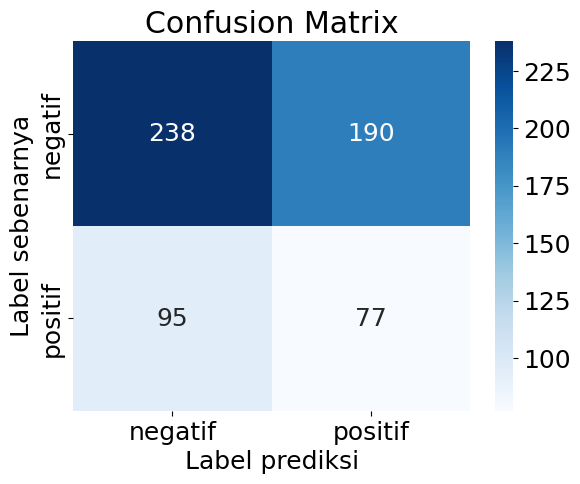

In [14]:
#naive bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

NB1 = MultinomialNB()
NB1.fit(x_train_smote1, y_train_smote1)

#test naive bayes accuracy
testLabelsPredicted=list(NB1.predict(x_test))

#print results
print("HASIL NAIVE BAYES CLASSIFIER TRAINING")
printResults(y_test, testLabelsPredicted)

## Train 2

HASIL NAIVE BAYES CLASSIFIER TRAINING
Accuracy =  0.5516666666666666
#################################
precision: [0.73451327 0.31417625]
recall: [0.5817757  0.47674419]
fscore: [0.64928292 0.37875289]
support: [428 172]
#################################
Macro F1  0.5140179036526945
Micro F1  0.5516666666666666
#############################


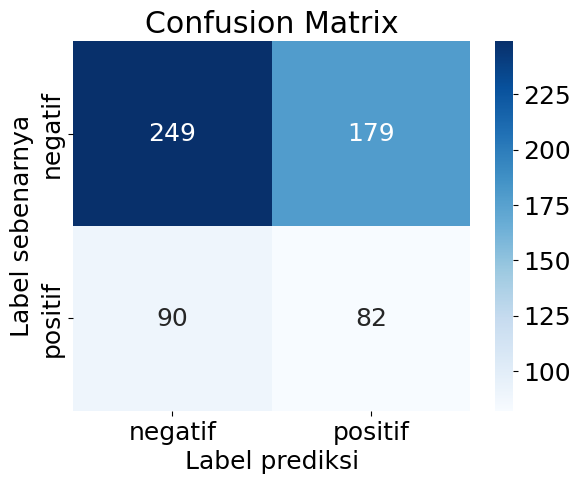

In [17]:
#naive bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

NB2 = MultinomialNB()
NB2.fit(x_train_smote2, y_train_smote2)

#test naive bayes accuracy
testLabelsPredicted=list(NB2.predict(x_test))

#print results
print("HASIL NAIVE BAYES CLASSIFIER TRAINING")
printResults(y_test, testLabelsPredicted)

## Train 3

HASIL NAIVE BAYES CLASSIFIER TRAINING
Accuracy =  0.7233333333333334
#################################
precision: [0.8700565  0.51219512]
recall: [0.71962617 0.73255814]
fscore: [0.78772379 0.60287081]
support: [428 172]
#################################
Macro F1  0.6952972992816848
Micro F1  0.7233333333333334
#############################


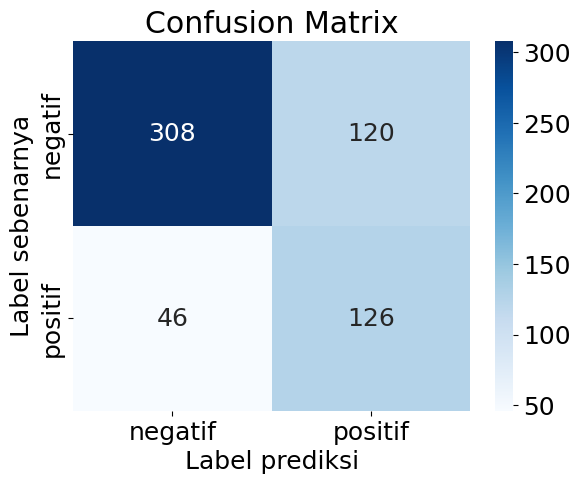

In [18]:
#naive bayes
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

NB3 = MultinomialNB()
NB3.fit(x_train_smote3, y_train_smote3)

#test naive bayes accuracy
testLabelsPredicted=list(NB3.predict(x_test))

#print results
print("HASIL NAIVE BAYES CLASSIFIER TRAINING")
printResults(y_test, testLabelsPredicted)